## Distributions in Pandas

### Distribution: Set of all possible random variables 
### Example: 
    - Flipping Coins for heads and tails 
        * a binomial distributions (two possible outcomes) 
        * discrete (categories of heads and tails, no real numbers) 
        * evenly weighted (heads are jsut as likely as tails)
    
    - Tornado events in Ann Arbot 
        * a bionomial distribution 
        * Discrete 
        * evenly weighted (tornadoes are rare events) 
        

In [1]:
import pandas as pd
import numpy as np

In [34]:
# to parameters chance we get a 0
np.random.binomial(1,0.5)


0

In [45]:
np.random.binomial(1000, 0.5)/1000

0

In [4]:
# 1000 simulations flipping a fair coin 20 times
x = np.random.binomial(20, .5, 10000)
print((x>=15).mean())

0.0215


In [30]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

8

In [47]:
chance_of_tornado = 0.01 

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000) 

two_days_in_a_row = 0 
for j in range(1, len(tornado_events) - 1): 
    if tornado_events[j] == 1 and tornado_events[j-1] == 1: 
        two_days_in_a_row +=1 

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365) )

110 tornadoes back to back in 2739 years


In [2]:
np.random.uniform(0,1)

0.9302778979569434

In [3]:
np.random.normal(0.75)

-0.9416529860531164

In [4]:
distribution = np.random.normal(0.75, size=1000)
np.sqrt(np.sum(np.mean(distribution) - distribution)**2)/len(distribution)

7.2830630415410272e-17

$$\sigma = \sqrt{\sum_{i=1}^{N}\frac{(x_{i} - \mu)^2}{N}}$$ where, $$\mu = \sum_{i=1}^{N}\frac{x_{i}}{N}$$

In [5]:
np.std(distribution) # numpy function. 

1.03692468809982

In [7]:
import scipy.stats as stats 


In [10]:
stats.kurtosis(distribution) #flat if negative, postive peeking. 

-0.006307516371369282

In [11]:
stats.skew(distribution)

0.19104715486030474

## Chi Squared Distribution 
    * Left skewed 
    * Degrees of freedom = 4

In [24]:
chi_squared_df2 = np.random.chisquare(2, size=10000)

In [25]:
stats.skew(chi_squared_df2)

1.968392649832563

In [28]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2098424351012977

In [16]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


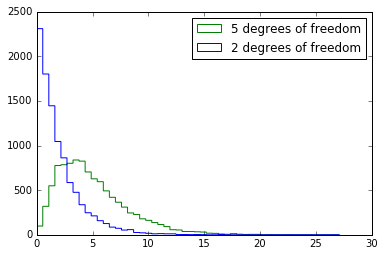

In [29]:
output = plt.hist([chi_squared_df2, chi_squared_df5], bins=50,histtype='step',label=['2 degrees of freedom', '5 degrees of freedom'])
plt.legend(loc='upper right')

## Bimodal distributions

In [30]:
# two gaussian distributions. 

## Hypothesis testing 

### Hypotehsis: A statemet we can test 
- Alternative hypothesis: Our idea, e.g. there is a difference between groups
- Null hypothesis: The alternative of our idea, e.g. there is no difference between groups

In [32]:
# A/B testing 
df = pd.read_csv('grades.csv')

In [34]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [35]:
len(df)

2315

In [36]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [37]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [38]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

## Hypothesis Testing 
### - Critical Value alpha 
- The threshold as to how much chance you are willing to accept
- Typical values in social sciences are 0.1, 0.05, or 0.01

In [43]:
# alpha = 0.05 
# ttest 
from scipy import stats

In [44]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [45]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [46]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.087101516341556676)

# p-hacking
### P-hacking, or Dredging 
- Doing many tests until you find one which is statistical significant 
- At a confidence level of 0.05, we expect to find one positive result time out of 20 test 

- Remedies: 
    - Bonferroni Correction
    - Hold-out sets 
    - investigation pre-registration